# Classification report

### Target dataset

In [11]:
TARGET_DATASET = 'TwReyes2013'
# Get project root
path = !pwd
report_path = '{}/{}/{}'.format('/'.join(path[0].split('/')[:-1]), 'reports', TARGET_DATASET)

TARGET_DATASET

'TwReyes2013'

### Lista dei file di report relativi alla feature testuale bow

In [12]:
import os
def read_file_list(target_text_feature):
	return [file for file in os.listdir(report_path)
			if file.split('.')[-1] == 'json' and target_text_feature in file]
report_file_list_bow = read_file_list('bow')
sorted(report_file_list_bow)

['bow$DecisionTreeClassifier.json',
 'bow$MultinomialNB.json',
 'bow$SVC.json',
 'bow-emot$DecisionTreeClassifier.json',
 'bow-emot$MultinomialNB.json',
 'bow-emot$SVC.json',
 'bow-pos$DecisionTreeClassifier.json',
 'bow-pos$MultinomialNB.json',
 'bow-pos$SVC.json',
 'bow-pos-emot$DecisionTreeClassifier.json',
 'bow-pos-emot$MultinomialNB.json',
 'bow-pos-emot$SVC.json',
 'bow-pp$DecisionTreeClassifier.json',
 'bow-pp$MultinomialNB.json',
 'bow-pp$SVC.json',
 'bow-pp-emot$DecisionTreeClassifier.json',
 'bow-pp-emot$MultinomialNB.json',
 'bow-pp-emot$SVC.json',
 'bow-pp-pos$DecisionTreeClassifier.json',
 'bow-pp-pos$MultinomialNB.json',
 'bow-pp-pos$SVC.json',
 'bow-pp-pos-emot$DecisionTreeClassifier.json',
 'bow-pp-pos-emot$MultinomialNB.json',
 'bow-pp-pos-emot$SVC.json']

### Dataframe Bow

In [13]:
import json
from pandas.io.json import json_normalize

CLASSIFIER_NAME = {'DecisionTreeClassifier': 'DecisionTree',
				   'SVC': 'SVM',
				   'MultinomialNB': 'MultinomialNB'
				   }
# Read all data
def read_report_file(report_file_list):	
	report_list = []
	for report_file in report_file_list:	
		with open('{}/{}'.format(report_path, report_file)) as file:
			data = json.load(file)
			# Save data
			out = dict()
			out['classifier'] = CLASSIFIER_NAME[data['classifier']]
			out['features'] = data['features']
			out['confusion-matrix'] = data['overall']['confusion-matrix']
			out.update(data['overall']['report'])
			report_list.append(out)
	# Radix sort
	report_list.sort(key=lambda x: x['classifier'])
	report_list.sort(key=lambda x: x['features'])
	report_list.sort(key=lambda x: len(x['features'].split('-')))
	return report_list

# Flatten data
report_bow = read_report_file(report_file_list_bow)
df_bow = json_normalize(report_bow)
df_bow.head()


,False.f1-score,False.precision,False.recall,False.support,True.f1-score,True.precision,True.recall,True.support,accuracy,classifier,confusion-matrix,features,macro avg.f1-score,macro avg.precision,macro avg.recall,macro avg.support,weighted avg.f1-score,weighted avg.precision,weighted avg.recall,weighted avg.support
0,0.910024,0.903078,0.917116,30000.0,0.721361,0.739398,0.704487,10000.0,0.864000,DecisionTree,"[[27514.0, 2486.0], [2954.0, 7046.0]]",bow,0.815693,0.821238,0.810802,40000.0,0.862875,0.862149,0.864000,40000.0
1,0.917592,0.923487,0.911817,30000.0,0.758991,0.745507,0.773294,10000.0,0.877200,MultinomialNB,"[[27355.0, 2645.0], [2267.0, 7733.0]]",bow,0.838291,0.834497,0.842556,40000.0,0.877945,0.878985,0.877200,40000.0
2,0.925559,0.904764,0.947354,30000.0,0.754036,0.816374,0.700746,10000.0,0.885725,SVM,"[[28421.0, 1579.0], [2992.0, 7008.0]]",bow,0.839798,0.860569,0.824050,40000.0,0.882686,0.882654,0.885725,40000.0
3,0.909781,0.900198,0.919592,30000.0,0.717235,0.742249,0.694027,10000.0,0.863225,DecisionTree,"[[27588.0, 2412.0], [3059.0, 6941.0]]",bow-emot,0.813508,0.821223,0.806809,40000.0,0.861660,0.860715,0.863225,40000.0
4,0.915156,0.923077,0.907416,30000.0,0.754005,0.736111,0.773104,10000.0,0.873850,MultinomialNB,"[[27223.0, 2777.0], [2269.0, 7731.0]]",bow-emot,0.834581,0.829594,0.840260,40000.0,0.874871,0.876328,0.873850,40000.0


## Features a confronto

In [14]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np
%matplotlib inline

FONTSIZE = 22
FONTSIZE_TITLE = 26
Y_SIZE = 14
plt.rc('font', size=FONTSIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONTSIZE_TITLE)     # fontsize of the axes title
colors = get_cmap("Set1").colors

reports_list = ['macro avg.precision', 'macro avg.recall', 'macro avg.f1-score', 'accuracy']
report_dict = {'macro avg.precision': 'Precision',
			   'macro avg.recall': 'Recall',
			   'macro avg.f1-score': 'F1',
			   'accuracy': 'Accuracy'}
print('Target score:\n{}'.format(', '.join(report_dict.values())))

Target score:
Precision, Recall, F1, Accuracy


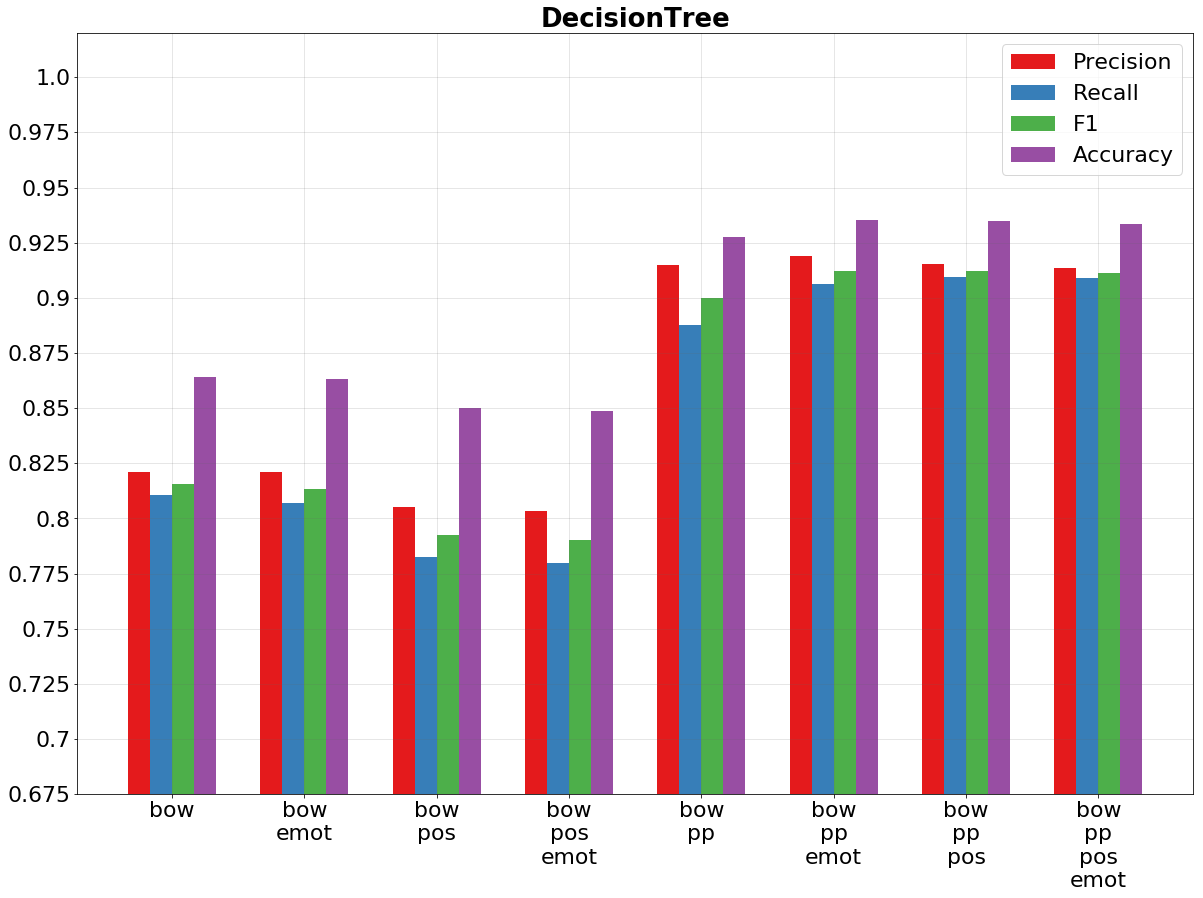

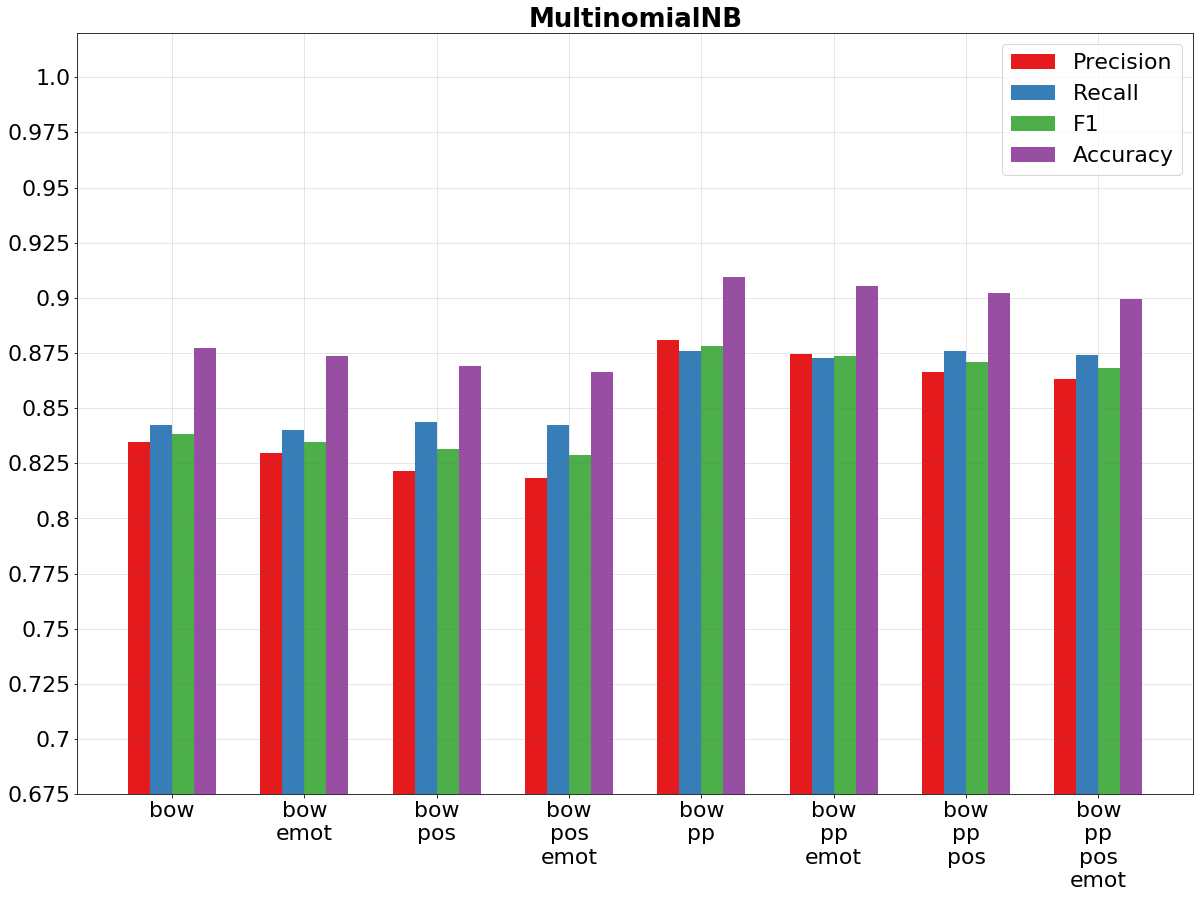

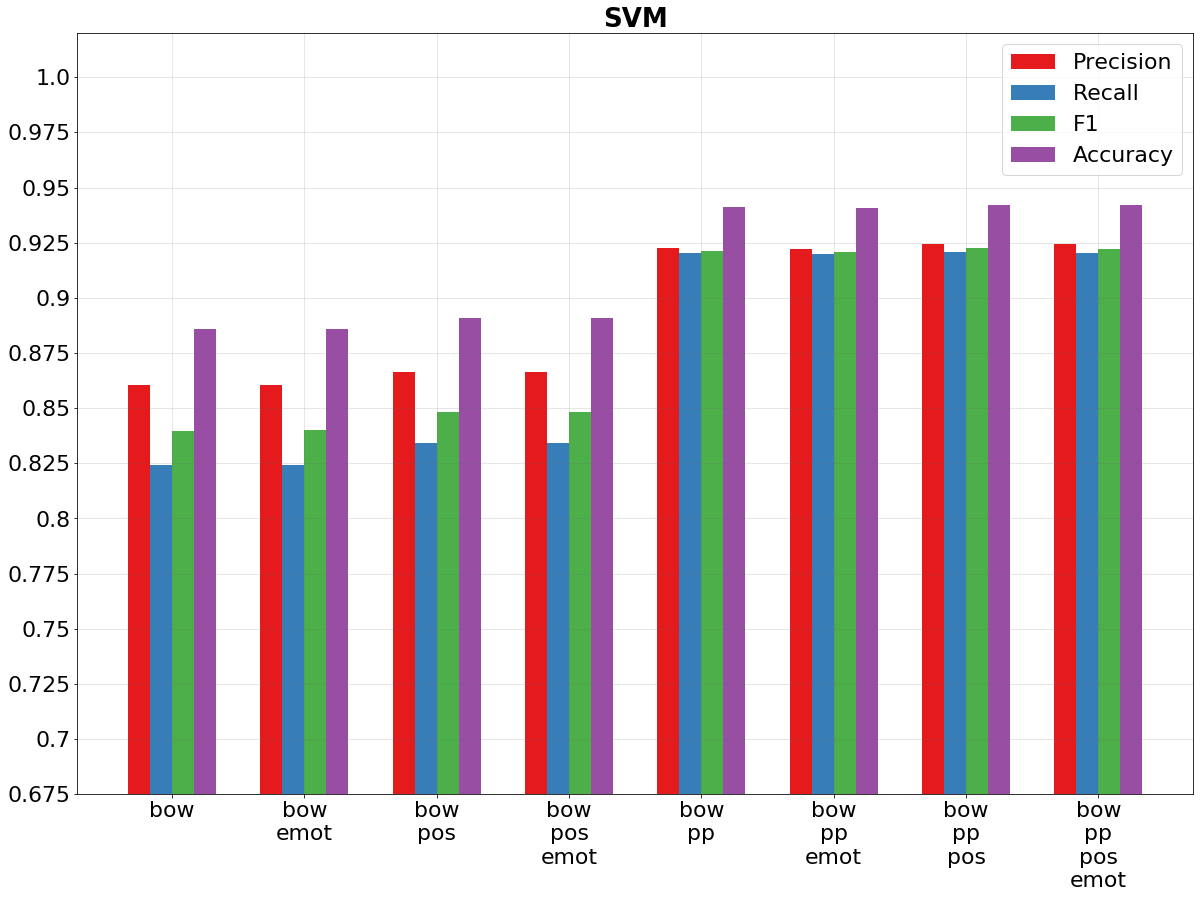

In [15]:
features_list = df_bow['features'].unique()
# Swap element
features_list[3], features_list[4] = features_list[4], features_list[3]

def evaluate_features_data(classifier):
	plot_values = []
	for feature in features_list:
		values = []
		for report in reports_list:
			value = df_bow[((df_bow['features'] == feature) & (df_bow['classifier'] == classifier))][report]
			values.append(float(value))
		plot_values.append(values)
	plot_values = np.transpose(np.array(plot_values))
	return plot_values

def plot_features(plot_values, classifier_name):
	# Figure
	fig, ax = plt.subplots(figsize=(20, Y_SIZE))
	bar_width = 0.75
	indx = np.arange(len(features_list)) * 4.5
	yndx = [round(x, 3) for x in np.arange(0, 1.05, 0.025)]
	# Data
	for i, (values, report, color) in enumerate(zip(plot_values, reports_list, colors)):
		plt.bar(indx + bar_width * i, values, color=color, width=bar_width, label=report_dict[report])
	# X axis
	ax.set_xticks(indx + bar_width * 1.5)
	ax.set_xticklabels(['\n'.join(features.split('-')) for features in features_list])
	# Y axis
	ax.set_yticks(yndx)
	ax.set_yticklabels(yndx)
	#min_value = np.min(plot_values)
	min_value = 0.75
	plt.ylim(min_value - min_value * 0.1, 1.02)
	# Legend
	ax.legend()
	# Show
	plt.title(classifier_name, fontdict={'size': FONTSIZE_TITLE, 'weight':'bold'})
	plt.grid(b=True, color='#666666', linestyle='-', alpha=0.2)
	plt.show()

# Plot each classifier
for classifier in df_bow['classifier'].unique():
	values = evaluate_features_data(classifier)
	plot_features(values, classifier)

## Ironic / Non ironic

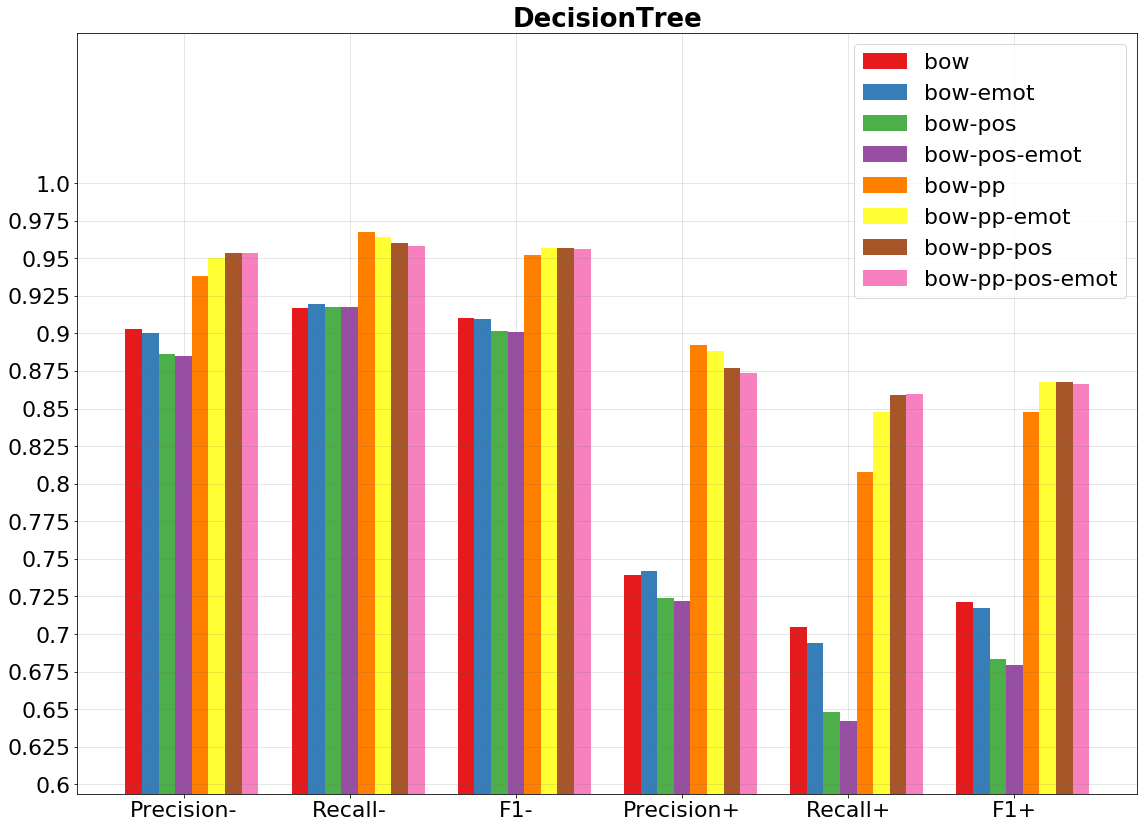

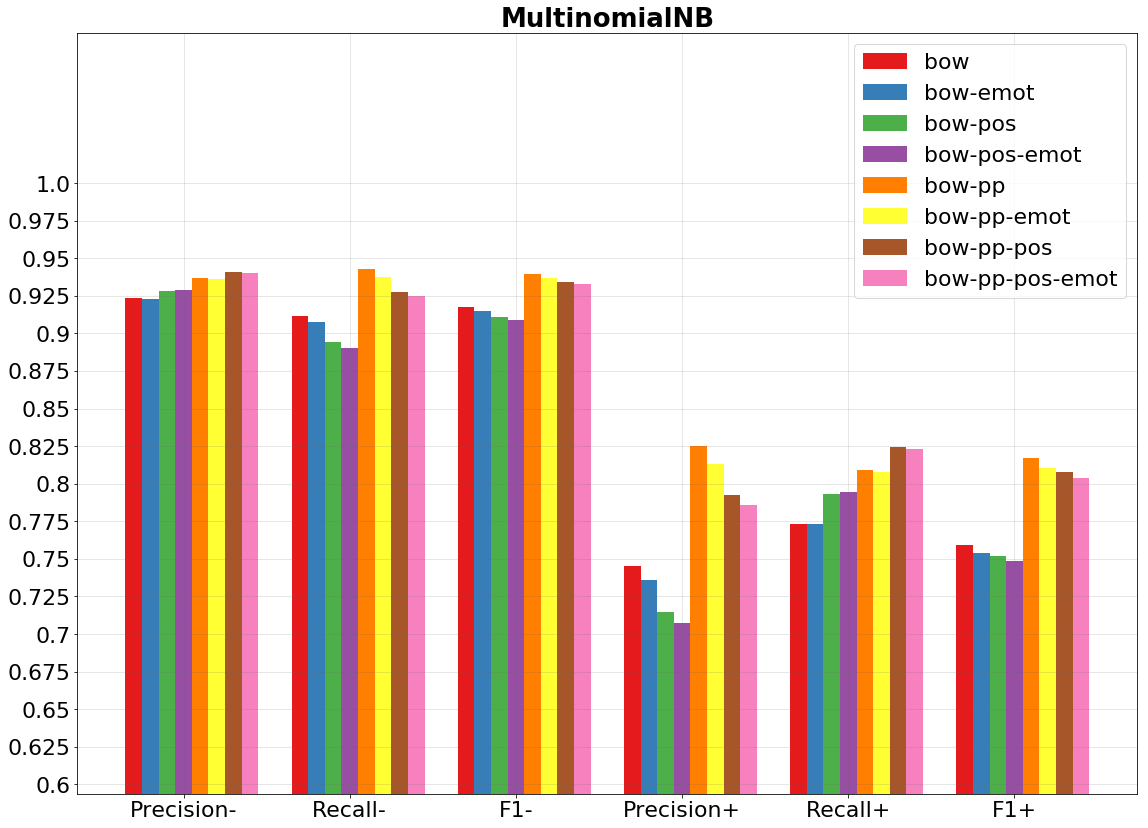

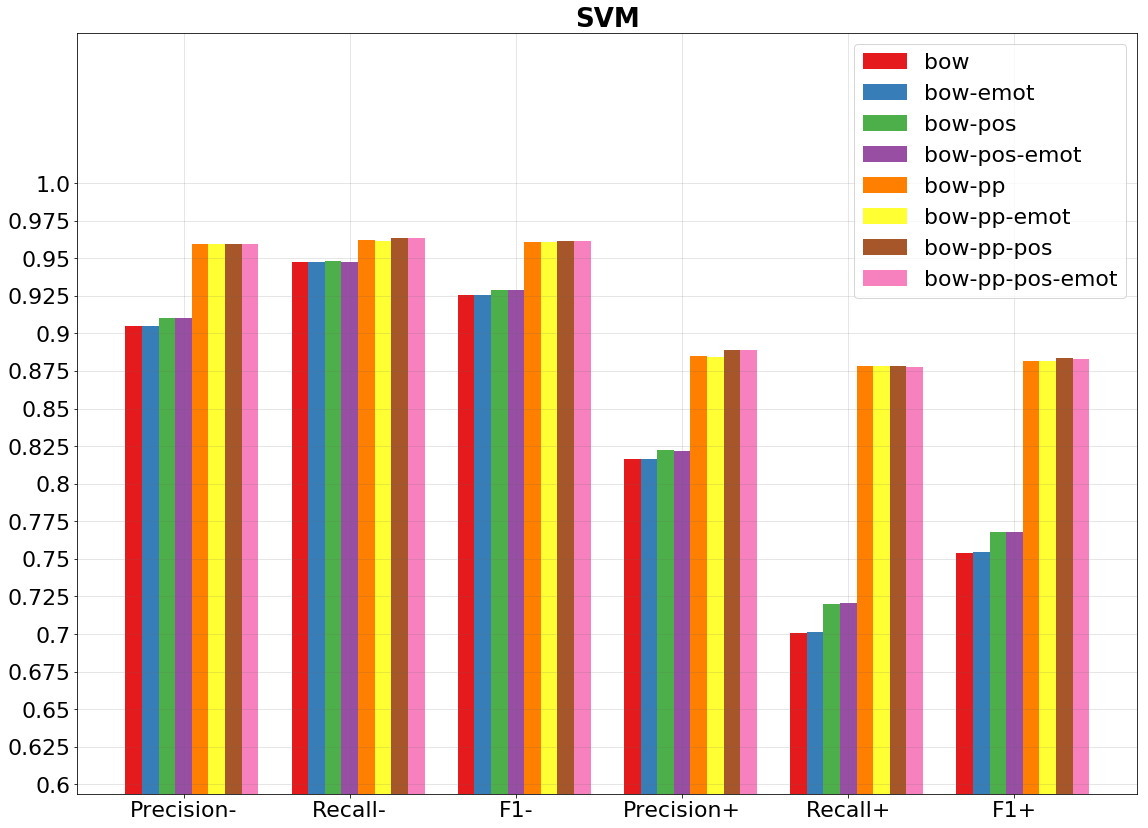

In [16]:
reports_list = ['{}.precision', '{}.recall', '{}.f1-score']
features_list = df_bow['features'].unique()
# Swap element
features_list[3],features_list[4] = features_list[4], features_list[3] 

def evaluate_emotions_data(classifier):
	reports = [r.format('False') for r in reports_list] + [r.format('True') for r in reports_list]
	
	plot_values = []
	for report in reports:
		values = []
		for feature in features_list:
			value = df_bow[((df_bow['features'] == feature) & (df_bow['classifier'] == classifier))][report]
			values.append(float(value))
		plot_values.append(values)
	plot_values = np.transpose(np.array(plot_values))
	return plot_values

def plot_emotions(plot_values, classifier):
	# Figure
	title = '{}'.format(classifier, 'Non ' if type == 'False' else '')
	# Plot
	fig, ax = plt.subplots(figsize=(19, Y_SIZE))
	bar_width = 0.4
	# Axis idx
	indx = np.arange(len(reports_list) * 2) * 4
	yndx = [round(x, 3) for x in np.arange(0, 1.025, 0.025)]
	# Data
	for i, (values, feature, color) in enumerate(zip(plot_values, features_list, colors)):
		plt.bar(indx + bar_width * i, values, color=color, width=bar_width, label=feature)
	# X axis
	ax.set_xticks(indx + bar_width * 3)
	names = ['Precision{}','Recall{}', 'F1{}']
	x_labels = [feature.format('-') for feature in names] + [feature.format('+') for feature in names] 
	ax.set_xticklabels(x_labels)
	# Y axis
	ax.set_yticks(yndx)
	ax.set_yticklabels(yndx)
	#min_value = np.min(plot_values)
	min_value = 0.625
	plt.ylim(min_value - min_value * 0.05, 1.10)
	# Legend
	ax.legend()
	plt.title(title, fontdict={'size': FONTSIZE_TITLE, 'weight':'bold'})
	plt.grid(b=True, color='#666666', linestyle='-', alpha=0.2)
	# Show
	plt.show()

# Plot each classifier
for classifier in df_bow['classifier'].unique():
	emotions_data = evaluate_emotions_data(classifier)
	plot_emotions(emotions_data, classifier)

## Confusion matrix

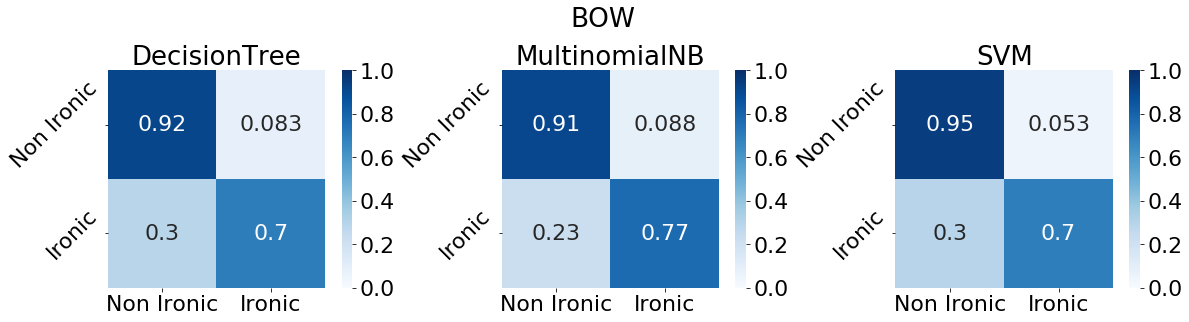

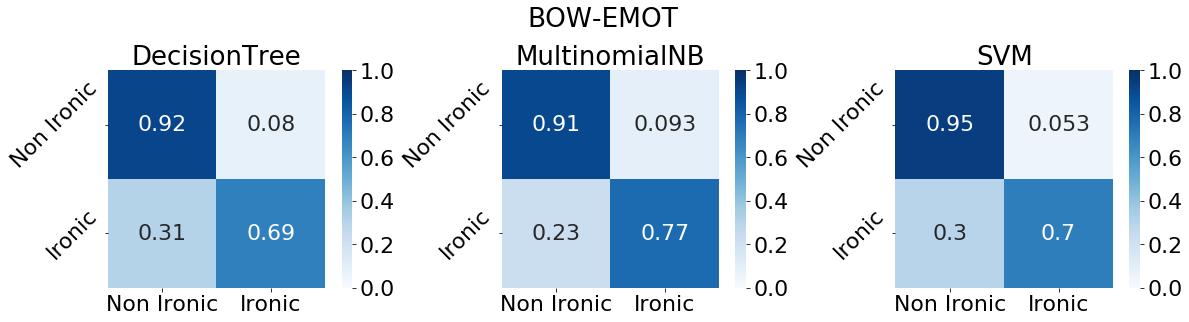

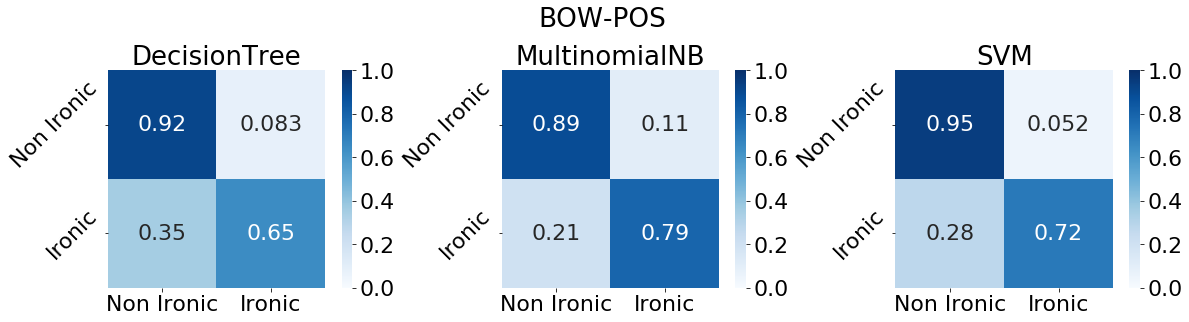

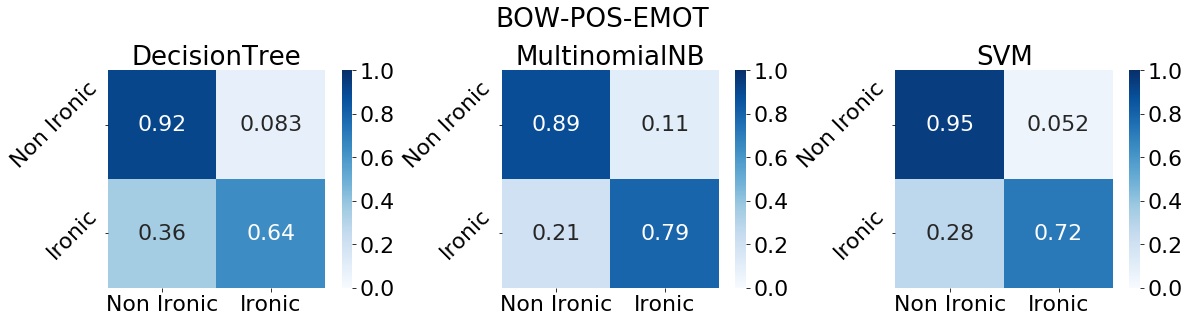

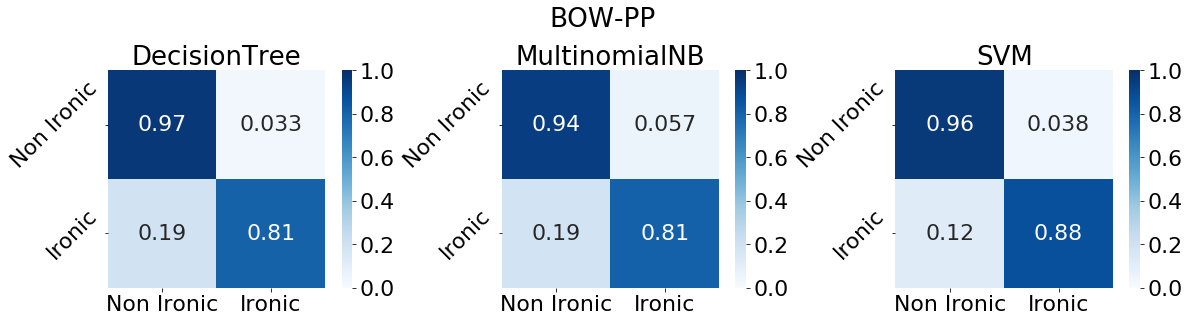

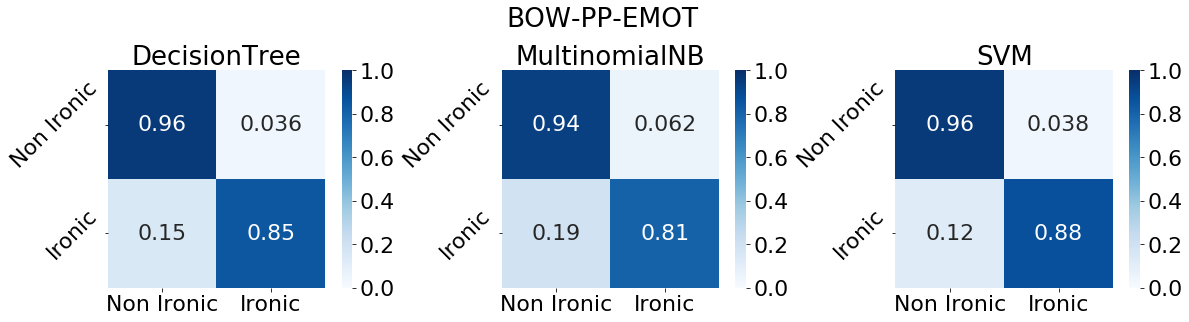

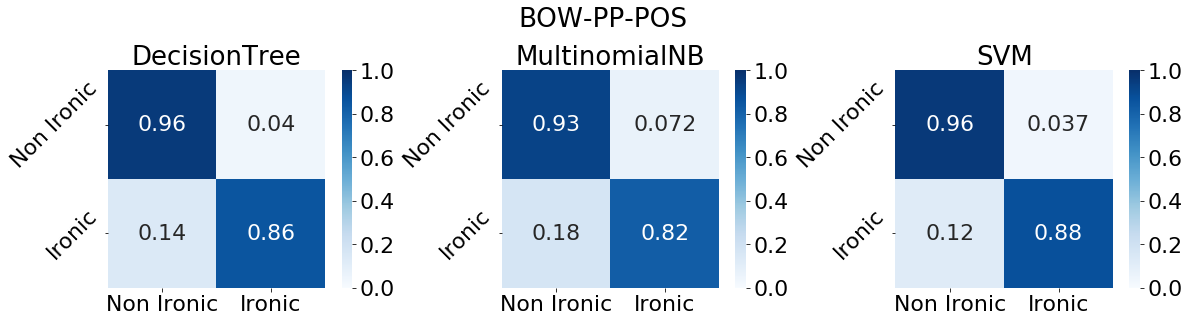

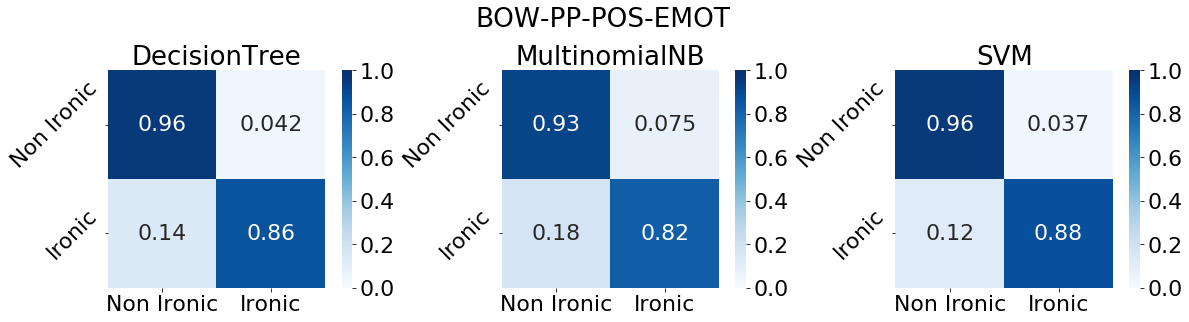

In [17]:
import seaborn as sns
classifer_list = df_bow['classifier'].unique()

def confusion_matrix_data():
	confusion_matrix_list = []
	for feature in features_list:
		values = []
		for classifier in classifer_list:
			matrix = df_bow[((df_bow['features'] == feature) & (df_bow['classifier'] == classifier))]
			values.append(np.array(matrix['confusion-matrix'].values[0]))
		confusion_matrix_list.append(values)
	return confusion_matrix_list


def plot_confusion_matrix(cm, title='Confusion matrix'):
	target_names = ['Non Ironic', 'Ironic']
	sns.heatmap(cm, annot=True, cmap=plt.cm.Blues, vmin=0, vmax=1,  square=True)
	plt.title(title)
	tick_marks = np.arange(len(target_names))
	plt.xticks(tick_marks + 0.5, target_names)
	plt.yticks(tick_marks + 0.5, target_names, va="center", rotation=45)

# Plot confusion matrix
confusion_matrix_list = confusion_matrix_data()

for i, feature in enumerate(features_list):
	plt.figure(figsize=(20, 4))
	for j, classifier in enumerate(classifer_list):	
		# Compute confusion 
		cm = confusion_matrix_list[i][j]
		cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
		plt.subplot(1, len(classifer_list), j+1)
		plot_confusion_matrix(cm_normalized, title=classifier)
	plt.suptitle(feature.upper(), fontdict={'size': FONTSIZE_TITLE, 'weight':'bold'}, y=1.1, ha='center')
	plt.show()

## BERT sentence embeddings
Per creare le feature testuali con BERT considero ogni documento e creo un tensore:

`12 x #Tokens x 768` 

Considero quindi l'ultimo layer della rete neurale e faccio la media aggregando i tokens

La matrice risultante sarà di tipo float della forma:

`#Documenti x 768` 

### Lista dei file di report relativi alla feature testuale bow

In [18]:
# Read Bert report
report_file_list_bert = read_file_list('bert')
sorted(report_file_list_bert)

['bert$DecisionTreeClassifier.json',
 'bert$SVC.json',
 'bert-emot$DecisionTreeClassifier.json',
 'bert-emot$SVC.json',
 'bert-pos$DecisionTreeClassifier.json',
 'bert-pos$SVC.json',
 'bert-pos-emot$DecisionTreeClassifier.json',
 'bert-pos-emot$SVC.json',
 'bert-pp$DecisionTreeClassifier.json',
 'bert-pp$SVC.json',
 'bert-pp-emot$DecisionTreeClassifier.json',
 'bert-pp-emot$SVC.json',
 'bert-pp-pos$DecisionTreeClassifier.json',
 'bert-pp-pos$SVC.json',
 'bert-pp-pos-emot$DecisionTreeClassifier.json',
 'bert-pp-pos-emot$SVC.json']

### Dataframe Bert

In [19]:
report_bert = read_report_file(report_file_list_bert)
df_bert = json_normalize(report_bert)
df_bert.head()

,False.f1-score,False.precision,False.recall,False.support,True.f1-score,True.precision,True.recall,True.support,accuracy,classifier,confusion-matrix,features,macro avg.f1-score,macro avg.precision,macro avg.recall,macro avg.support,weighted avg.f1-score,weighted avg.precision,weighted avg.recall,weighted avg.support
0,0.871918,0.871798,0.872072,30000.0,0.615420,0.615857,0.615201,10000.0,0.807850,DecisionTree,"[[26162.0, 3838.0], [3848.0, 6152.0]]",bert,0.743669,0.743828,0.743637,40000.0,0.807807,0.807845,0.807850,40000.0
1,0.952489,0.944132,0.960998,30000.0,0.852215,0.876382,0.829377,10000.0,0.928100,SVM,"[[28830.0, 1170.0], [1706.0, 8294.0]]",bert,0.902352,0.910257,0.895188,40000.0,0.927428,0.927202,0.928100,40000.0
2,0.871754,0.870919,0.872633,30000.0,0.613624,0.615655,0.611870,10000.0,0.807450,DecisionTree,"[[26179.0, 3821.0], [3881.0, 6119.0]]",bert-emot,0.742689,0.743287,0.742251,40000.0,0.807238,0.807126,0.807450,40000.0
3,0.952541,0.943467,0.961797,30000.0,0.851919,0.878352,0.827084,10000.0,0.928125,SVM,"[[28854.0, 1146.0], [1729.0, 8271.0]]",bert-emot,0.902230,0.910909,0.894440,40000.0,0.927391,0.927193,0.928125,40000.0
4,0.872022,0.871548,0.872541,30000.0,0.615100,0.616328,0.614162,10000.0,0.807925,DecisionTree,"[[26176.0, 3824.0], [3859.0, 6141.0]]",bert-pos,0.743561,0.743938,0.743352,40000.0,0.807797,0.807776,0.807925,40000.0


## BOW vs BERT

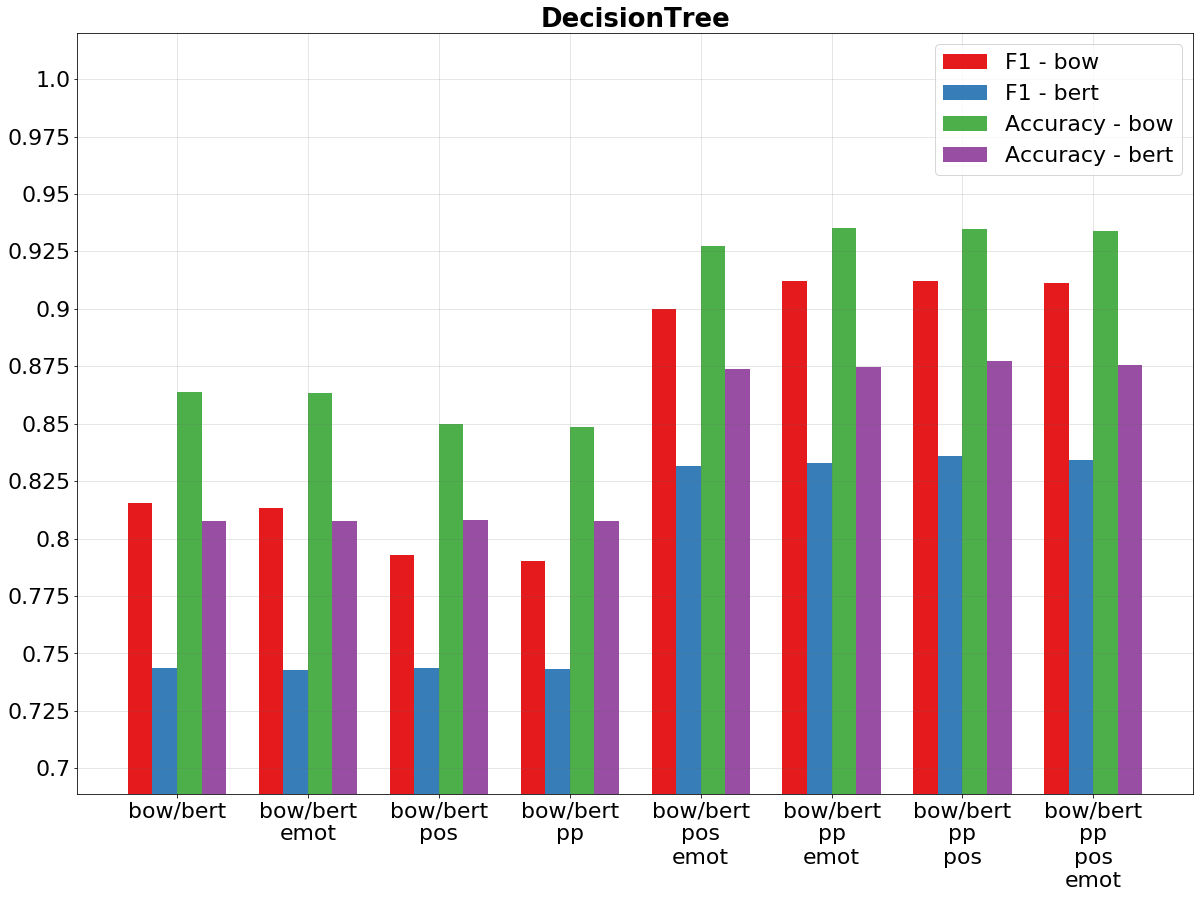

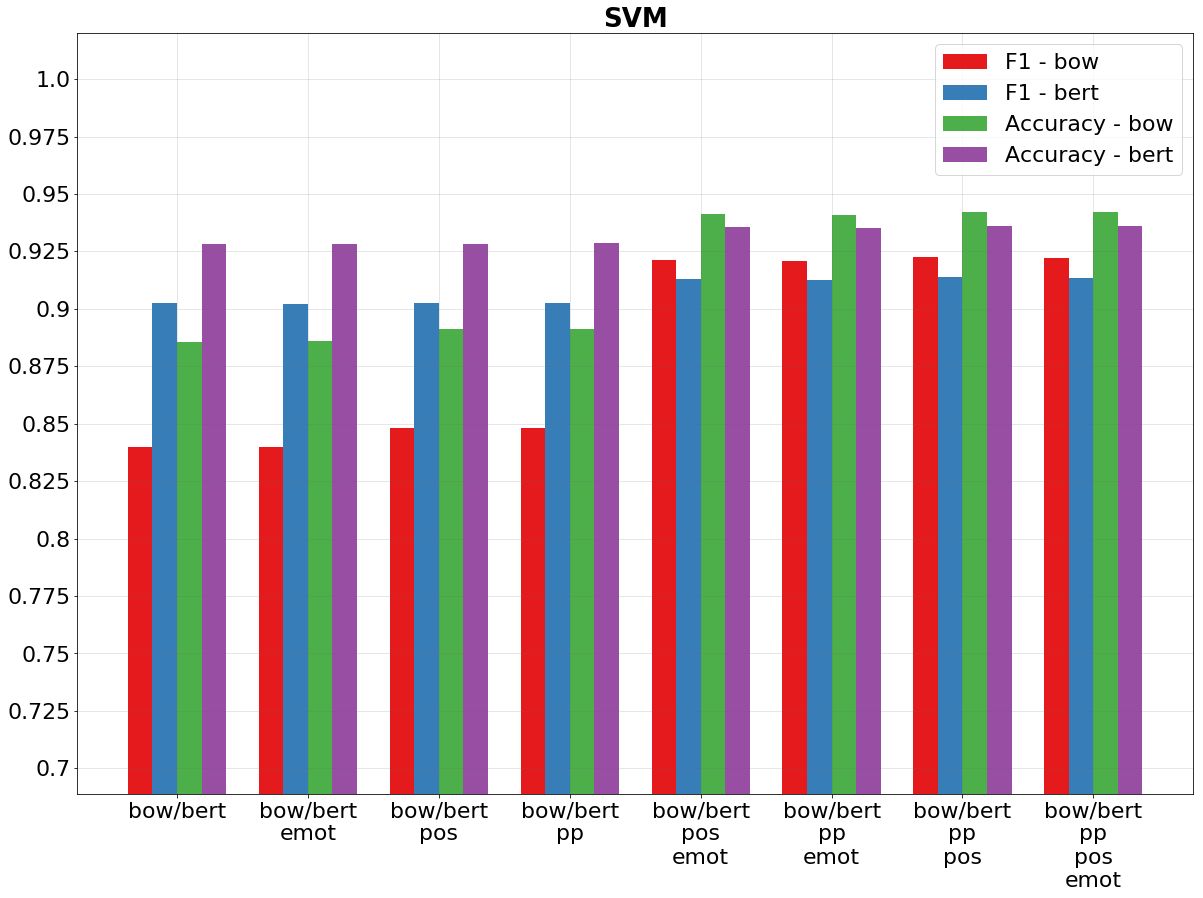

In [20]:
# Read Bert report
features_list = [(lambda x : '-'.join(['{}'] + x[1:]))(feature.split('-'))
				 for feature in df_bert['features'].unique()]
reports_list = ['macro avg.f1-score', 'accuracy']

def evaluate_bow_vs_bert(classifier):
	plot_values = []
	for feature in features_list:
		values = []
		for report in reports_list:
			for df, text_feature in zip([df_bow, df_bert], ['bow', 'bert']):
				value = df[((df['features'] == feature.format(text_feature)) &
							(df['classifier'] == classifier))][report]
				values.append(float(value))
		plot_values.append(values)
	plot_values[3], plot_values[4] = plot_values[4], plot_values[3]
	plot_values = np.transpose(np.array(plot_values))
	return plot_values

def plot_bow_vs_bert(plot_values, classifier_name):
	# Figure
	fig, ax = plt.subplots(figsize=(20, Y_SIZE))
	bar_width = 0.75
	indx = np.arange(len(features_list)) * 4
	yndx = [round(x, 3) for x in np.arange(0, 1.05, 0.025)]
	# Data
	target_report_list =  [i for j in reports_list for i in [j, j]]
	target_text_list = ['bow', 'bert'] * 2
	zip_data = zip(plot_values, target_report_list, target_text_list, colors)
	for i, (values, report, text_feature, color) in enumerate(zip_data):
		label = '{} - {}'.format(report_dict[report.format(text_feature)], text_feature)
		plt.bar(indx + bar_width * i, values, color=color, width=bar_width, label=label)
	# X axis
	ax.set_xticks(indx + bar_width * 1.5)
	ax.set_xticklabels(['\n'.join(features.format('bow/bert').split('-')) for features in features_list])
	# Y axis
	ax.set_yticks(yndx)
	ax.set_yticklabels(yndx)
	#min_value = np.min(plot_values)
	min_value = 0.725
	plt.ylim(min_value - min_value * 0.05, 1.02)
	# Legend
	ax.legend()
	# Show
	plt.title(classifier_name, fontdict={'size': FONTSIZE_TITLE, 'weight':'bold'})
	plt.grid(b=True, color='#666666', linestyle='-', alpha=0.2)
	plt.show()
	
# Rearrange	
for classifier in df_bert['classifier'].unique():
	plot_values = evaluate_bow_vs_bert(classifier)
	plot_bow_vs_bert(plot_values, classifier)